In [19]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For preprocessing and modeling
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


In [20]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/refs/heads/main/News.csv')

# Display the first 5 rows of the dataset
df.head()


,News,Fake
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True


In [21]:
# Check the structure of the dataset
print("Dataset Preview:")
display(df.head())

# Check for null values
print("\nMissing Values:")
print(df.isnull().sum())

# Check data types
print("\nData Types:")
print(df.dtypes)

# Check class distribution
print("\nClass Distribution:")
print(df['Fake'].value_counts())


Dataset Preview:


,News,Fake
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True



Missing Values:
News    0
Fake    0
dtype: int64

Data Types:
News    object
Fake      bool
dtype: object

Class Distribution:
Fake
True     5752
False    4488
Name: count, dtype: int64


In [22]:
# Rename columns for clarity
df.columns = ['text', 'label']

# Convert labels to binary format (1 for Fake, 0 for Real)
df['label'] = df['label'].astype(int) # Directly convert boolean to integer

# Drop any rows with missing values (if any)
df.dropna(inplace=True)

# Display updated dataset info
print("Updated Dataset:")
display(df.head())
print("\nClass Distribution After Encoding:")
print(df['label'].value_counts())

Updated Dataset:


,text,label
0,Says the Annies List political group supports ...,0
1,When did the decline of coal start? It started...,1
2,"Hillary Clinton agrees with John McCain ""by vo...",1
3,Health care reform legislation is likely to ma...,0
4,The economic turnaround started at the end of ...,1



Class Distribution After Encoding:
label
1    5752
0    4488
Name: count, dtype: int64


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Rename columns for consistency
df.columns = ['text', 'label']

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform the text data
X = vectorizer.fit_transform(df['text'])

# Labels
y = df['label']

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data vectorized and split successfully.")
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


Data vectorized and split successfully.
Training samples: 8192, Testing samples: 2048


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['label'])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy Score: 0.60400390625

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.43      0.49       888
           1       0.63      0.74      0.68      1160

    accuracy                           0.60      2048
   macro avg       0.59      0.58      0.58      2048
weighted avg       0.60      0.60      0.59      2048


Confusion Matrix:
 [[383 505]
 [306 854]]


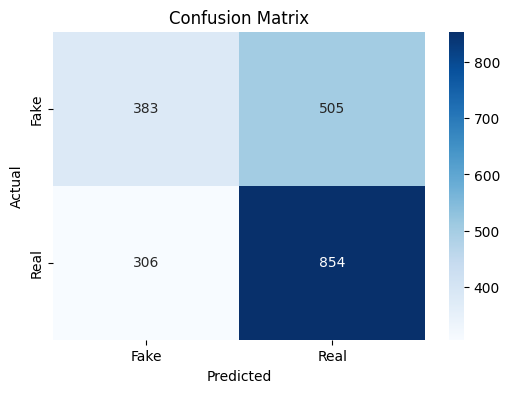

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [29]:
# Function to predict new input
def predict_news(news_text):
    transformed_text = vectorizer.transform([news_text])
    prediction = model.predict(transformed_text)
    return "Real" if prediction[0] == 1 else "Fake"

# Example usage
sample_news = "Hillary Clinton agrees with John McCain ""by voting to give George Bush the benefit of the doubt on Iran."
print(f"Prediction: {predict_news(sample_news)}")


Prediction: Real
